In [103]:
import pandas as pd

df = pd.read_csv("human_cognitive_performance_clean.csv")

print(df.shape)
print(df.columns)
df.head()

(80000, 14)
Index(['user_id', 'age', 'gender', 'sleep_duration', 'stress_level',
       'diet_type', 'daily_screen_time', 'exercise_frequency',
       'caffeine_intake', 'reaction_time', 'memory_test_score',
       'cognitive_score', 'ai_predicted_score', 'age_group'],
      dtype='object')


,user_id,age,gender,sleep_duration,stress_level,diet_type,daily_screen_time,exercise_frequency,caffeine_intake,reaction_time,memory_test_score,cognitive_score,ai_predicted_score,age_group
0,U1,57,Female,6.5,3,Non-Vegetarian,6.5,Medium,41,583.33,65,36.71,39.77,45-59
1,U2,39,Female,7.6,9,Non-Vegetarian,10.8,High,214,368.24,58,54.35,57.68,30-44
2,U3,26,Male,8.2,6,Vegetarian,5.7,Low,429,445.21,49,32.57,29.54,18-29
3,U4,32,Male,7.8,9,Vegetarian,8.3,Low,464,286.33,94,70.15,74.59,30-44
4,U5,50,Male,9.7,2,Non-Vegetarian,11.3,Medium,365,237.65,62,87.54,91.78,45-59


In [104]:
var = "sleep_duration"
out1 = "cognitive_score"
out2 = "reaction_time"

In [105]:
# Variable Check

# Missing values
print("Missing:", df[var].isna().sum())

# Basic range
print("Min:", df[var].min())
print("Max:", df[var].max())

# Quick look at smallest + largest values (to spot weird stuff)
print("\nSmallest 10:")
print(df[var].sort_values().head(10))

print("\nLargest 10:")
print(df[var].sort_values().tail(10))


Missing: 0
Min: 4.0
Max: 10.0

Smallest 10:
14890    4.0
23031    4.0
54058    4.0
11728    4.0
54017    4.0
38703    4.0
54011    4.0
38730    4.0
1041     4.0
29434    4.0
Name: sleep_duration, dtype: float64

Largest 10:
48056    10.0
18211    10.0
76249    10.0
79257    10.0
50418    10.0
44033    10.0
58054    10.0
65971    10.0
47347    10.0
30152    10.0
Name: sleep_duration, dtype: float64


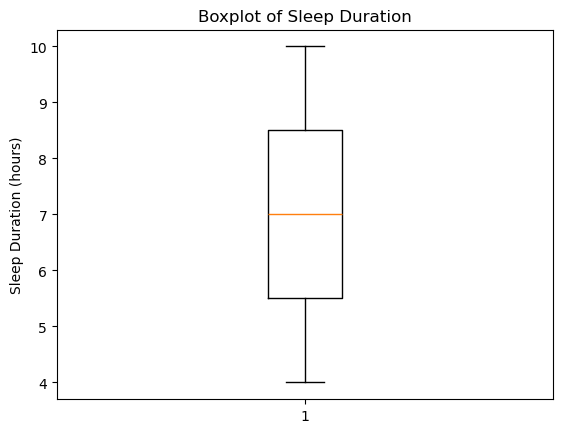

In [106]:
# Distribution

import matplotlib.pyplot as plt

var = "sleep_duration"

plt.figure()
plt.boxplot(df[var].dropna())
plt.title("Boxplot of Sleep Duration")
plt.ylabel("Sleep Duration (hours)")
plt.show()

Sleep duration is centered around ~7 hours, with most participants falling between approximately 5.5 and 8.5 hours.

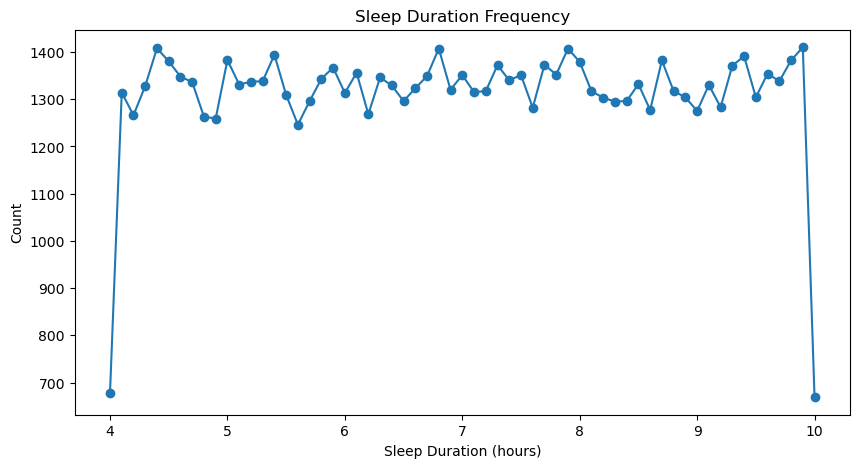

In [107]:
counts = df[var].value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.plot(counts.index, counts.values, marker="o")
plt.title("Sleep Duration Frequency")
plt.xlabel("Sleep Duration (hours)")
plt.ylabel("Count")
plt.show()

Sleep duration values appear fairly evenly distributed across the range, with slightly fewer participants at the lowest (4 hours) and highest (10 hours) values.

In [108]:
# Summary Statistics 

import pandas as pd

var = "sleep_duration"

summary = pd.DataFrame({
    "Statistic": [
        "Count",
        "Missing",
        "Mean",
        "Median",
        "Std Dev",
        "Min",
        "Max"
    ],
    "Value": [
        df[var].count(),
        df[var].isna().sum(),
        round(df[var].mean(), 2),
        round(df[var].median(), 2),
        round(df[var].std(), 2),
        df[var].min(),
        df[var].max()
    ]
})

summary

,Statistic,Value
0,Count,80000.00
1,Missing,0.00
2,Mean,7.01
3,Median,7.00
4,Std Dev,1.73
5,Min,4.00
6,Max,10.00


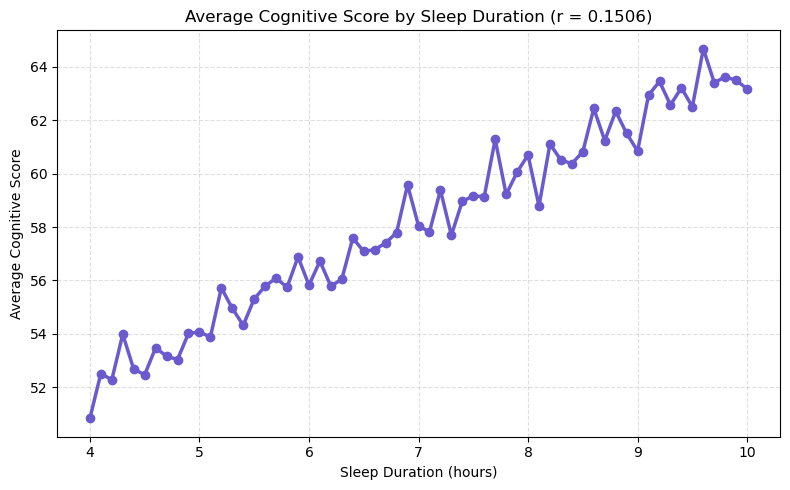

STEP 4 r (sleep_duration vs cognitive_score): 0.1506


In [109]:
# Sleep vs Cognitive Score

means_cog = df.groupby(var)[out1].mean().sort_index()
r_cog = df[var].corr(df[out1])

plt.figure(figsize=(8,5))
plt.plot(means_cog.index, means_cog.values, marker="o", linewidth=2.5, color="#6A5ACD")
plt.title(f"Average Cognitive Score by Sleep Duration (r = {r_cog:.4f})")
plt.xlabel("Sleep Duration (hours)")
plt.ylabel("Average Cognitive Score")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

print("STEP 4 r (sleep_duration vs cognitive_score):", round(r_cog, 4))

Sleep duration shows a positive relationship with cognitive score. As sleep duration increases from about 4 to 10 hours, the average cognitive score steadily increases, suggesting that individuals who sleep longer tend to have slightly higher cognitive performance. The correlation supports this as a weak positive relationship (r = 0.1506), meaning sleep duration is associated with cognitive score but is not a strong predictor on its own


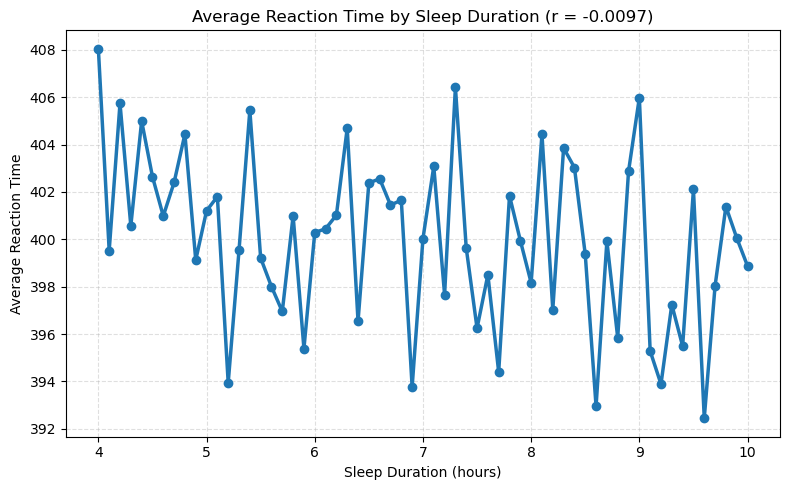

The r value for (sleep_duration vs reaction_time): -0.0097


In [110]:
# Sleep vs Reaction Time

means_rt = df.groupby(var)[out2].mean().sort_index()
r_rt = df[var].corr(df[out2])

plt.figure(figsize=(8,5))
plt.plot(means_rt.index, means_rt.values, marker="o", linewidth=2.5, color="#1f77b4")
plt.title(f"Average Reaction Time by Sleep Duration (r = {r_rt:.4f})")
plt.xlabel("Sleep Duration (hours)")
plt.ylabel("Average Reaction Time")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

print("The r value for (sleep_duration vs reaction_time):", round(r_rt, 4))

Sleep duration shows essentially no relationship with reaction time (r = -0.0097). Average reaction time remains relatively stable across different sleep durations, suggesting that sleep duration does not strongly influence reaction time in this dataset.

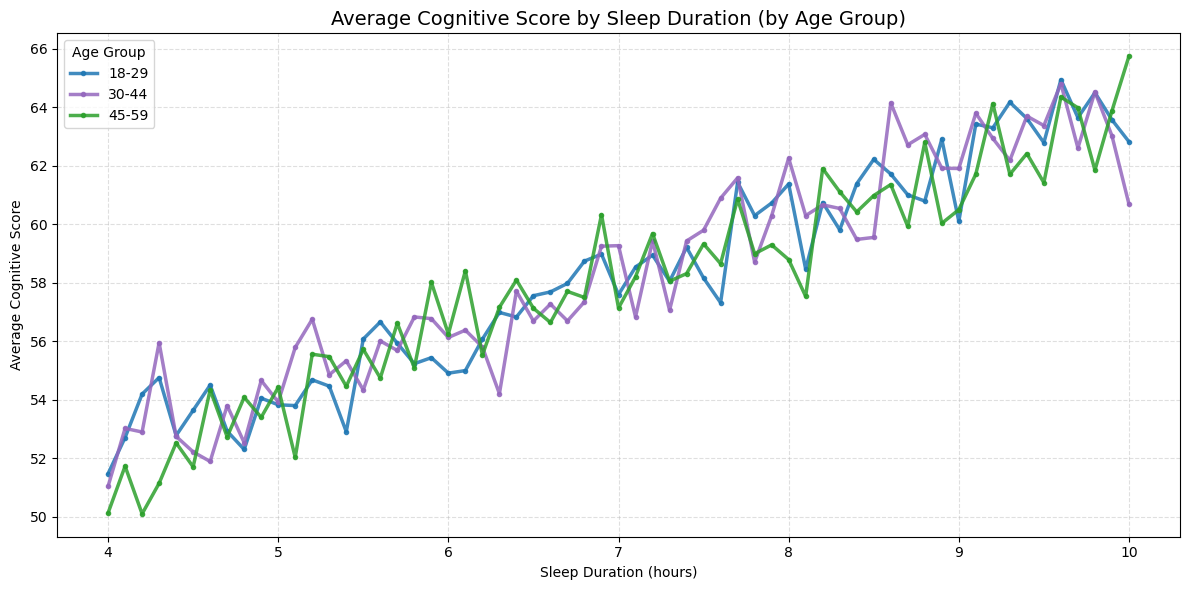

STEP 6B: Correlation by Age Group (Sleep vs Cognitive Score)
18-29 : 0.1526
30-44 : 0.1498
45-59 : 0.1498


In [111]:
# Age Group Breakdown (Cognitive Score)

means_age_cog = df.groupby(["age_group", var])[out1].mean().reset_index()

colors = {
    "18-29": "#1f77b4",
    "30-44": "#9467bd",
    "45-59": "#2ca02c",
    "60+":   "#ff7f0e"
}

plt.figure(figsize=(12,6))
for group in sorted(means_age_cog["age_group"].unique()):
    subset = means_age_cog[means_age_cog["age_group"] == group].sort_values(var)
    plt.plot(
        subset[var], subset[out1],
        linewidth=2.5, marker="o", markersize=3, alpha=0.85,
        label=group, color=colors.get(group, "black")
    )

plt.title("Average Cognitive Score by Sleep Duration (by Age Group)", fontsize=14)
plt.xlabel("Sleep Duration (hours)")
plt.ylabel("Average Cognitive Score")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(title="Age Group")
plt.tight_layout()
plt.show()


# Age Group Correlations (Cognitive Score)

print("STEP 6B: Correlation by Age Group (Sleep vs Cognitive Score)")
for group, gdf in df.groupby("age_group"):
    r = gdf[var].corr(gdf[out1])
    print(group, ":", round(r, 4))

Across all age groups shown (18–29, 30–44, 45–59), cognitive score increases steadily as sleep duration increases. The trend is consistent across age groups, with no major differences in slope, suggesting that the positive relationship between sleep and cognitive performance is fairly similar regardless of age group.

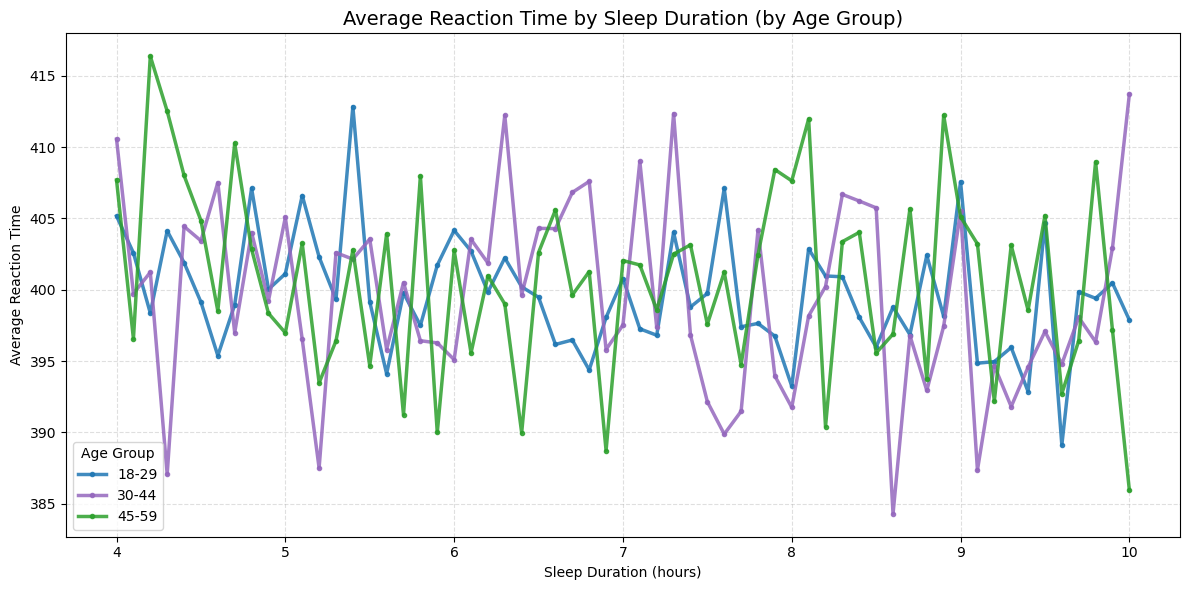

Correlation by Age Group (Sleep vs Reaction Time)
18-29 : -0.0113
30-44 : -0.0111
45-59 : -0.007


In [112]:
# Age Group Breakdown (Reaction Time)

means_age_rt = df.groupby(["age_group", var])[out2].mean().reset_index()

plt.figure(figsize=(12,6))
for group in sorted(means_age_rt["age_group"].unique()):
    subset = means_age_rt[means_age_rt["age_group"] == group].sort_values(var)
    plt.plot(
        subset[var], subset[out2],
        linewidth=2.5, marker="o", markersize=3, alpha=0.85,
        label=group, color=colors.get(group, "black")
    )

plt.title("Average Reaction Time by Sleep Duration (by Age Group)", fontsize=14)
plt.xlabel("Sleep Duration (hours)")
plt.ylabel("Average Reaction Time")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(title="Age Group")
plt.tight_layout()
plt.show()


# Age Group Correlations (Reaction Time)

print("Correlation by Age Group (Sleep vs Reaction Time)")
for group, gdf in df.groupby("age_group"):
    r = gdf[var].corr(gdf[out2])
    print(group, ":", round(r, 4))

Across age groups, sleep duration showed almost no relationship with reaction time. Correlations were extremely close to zero for all age categories (18–29: r = -0.0113, 30–44: r = -0.0111, 45–59: r = -0.0070), indicating that reaction time remains relatively stable regardless of sleep duration. This suggests that sleep duration is not a strong predictor of reaction speed in this dataset.

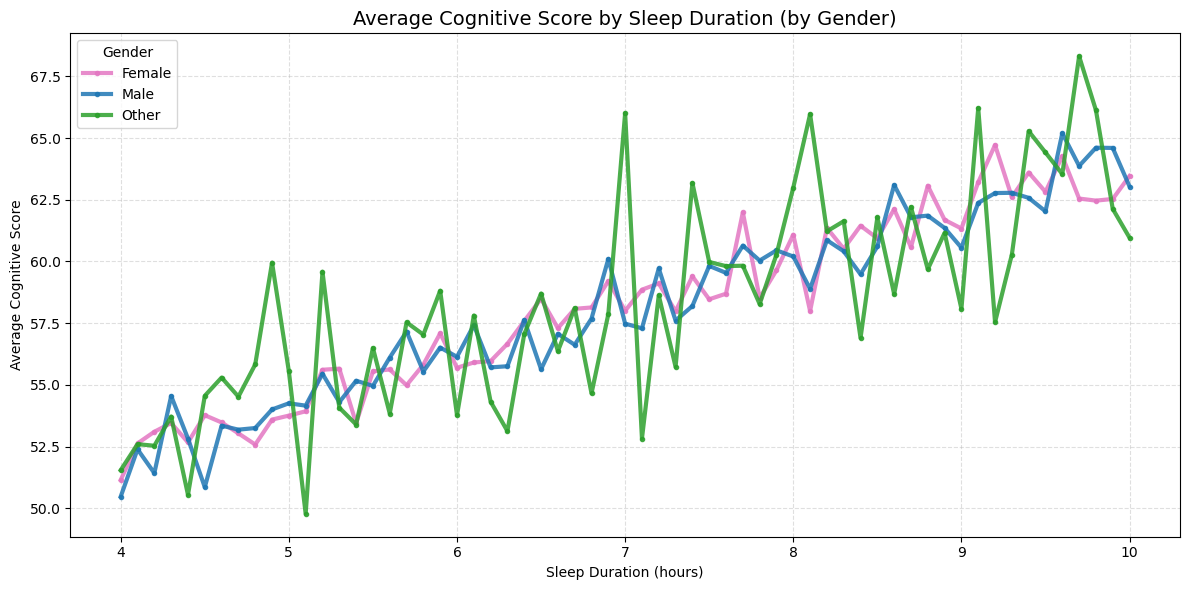

Correlation by Gender (Sleep vs Cognitive Score)
Female : 0.1495
Male : 0.1529
Other : 0.1364


In [113]:
# Correlation with cognitive score

import matplotlib.pyplot as plt

var = "sleep_duration"
outcome = "cognitive_score"

means_gender_cog = df.groupby(["gender", var])[outcome].mean().reset_index()

gender_colors = {
    "Female": "#e377c2",
    "Male": "#1f77b4",
    "Other": "#2ca02c"
}

plt.figure(figsize=(12,6))

for g in sorted(means_gender_cog["gender"].unique()):
    subset = means_gender_cog[means_gender_cog["gender"] == g].sort_values(var)
    plt.plot(
        subset[var], subset[outcome],
        linewidth=3, marker="o", markersize=3, alpha=0.85,
        label=g, color=gender_colors.get(g, "black")
    )

plt.title("Average Cognitive Score by Sleep Duration (by Gender)", fontsize=14)
plt.xlabel("Sleep Duration (hours)")
plt.ylabel("Average Cognitive Score")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

var = "sleep_duration"
outcome = "cognitive_score"

print("Correlation by Gender (Sleep vs Cognitive Score)")
for g, gdf in df.groupby("gender"):
    r = gdf[var].corr(gdf[outcome])
    print(g, ":", round(r, 4))

Sleep duration showed a weak positive correlation with cognitive score across all gender groups. The relationship was very consistent between males (r = 0.1529) and females (r = 0.1495), with the “Other” category showing a slightly weaker but still positive relationship (r = 0.1364). Overall, this suggests that increased sleep duration is associated with slightly higher cognitive performance regardless of gender.

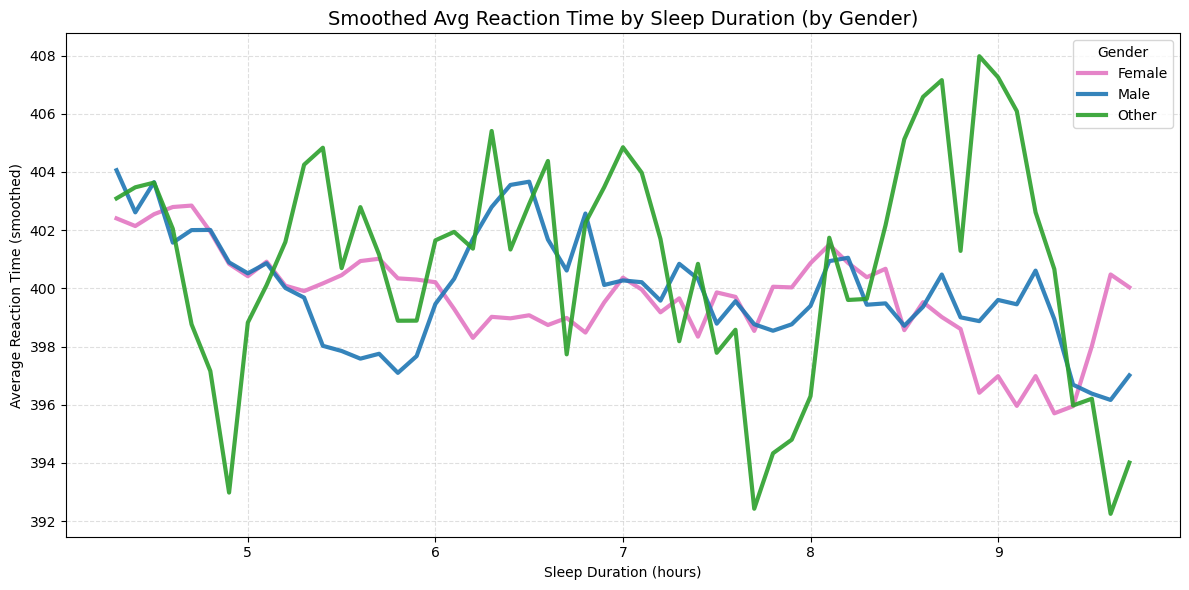

Correlation by Gender (Sleep vs Reaction Time)
Female : -0.0079
Male : -0.012
Other : -0.0044


In [114]:
# Correlation with reaction time

import matplotlib.pyplot as plt

var = "sleep_duration"
outcome = "reaction_time"

means_gender_rt = df.groupby(["gender", var])[outcome].mean().reset_index()

gender_colors = {
    "Female": "#e377c2",
    "Male": "#1f77b4",
    "Other": "#2ca02c"
}

plt.figure(figsize=(12,6))

for g in sorted(means_gender_rt["gender"].unique()):
    subset = means_gender_rt[means_gender_rt["gender"] == g].sort_values(var)
    subset["smooth"] = subset[outcome].rolling(window=7, center=True).mean()
    plt.plot(
        subset[var], subset["smooth"],
        linewidth=3, alpha=0.9,
        label=g, color=gender_colors.get(g, "black")
    )

plt.title("Smoothed Avg Reaction Time by Sleep Duration (by Gender)", fontsize=14)
plt.xlabel("Sleep Duration (hours)")
plt.ylabel("Average Reaction Time (smoothed)")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

var = "sleep_duration"
outcome = "reaction_time"

print("Correlation by Gender (Sleep vs Reaction Time)")
for g, gdf in df.groupby("gender"):
    r = gdf[var].corr(gdf[outcome])
    print(g, ":", round(r, 4))


Sleep duration showed almost no relationship with reaction time across gender groups. Correlations were all extremely close to zero (Female: r = -0.0079, Male: r = -0.0120, Other: r = -0.0044), indicating that reaction time remains relatively stable across different sleep durations. This suggests sleep duration is not a meaningful predictor of reaction speed in this dataset.

In [115]:
# Strength Metrics

import pandas as pd

var = "sleep_duration"

overall = pd.DataFrame({
    "Group": ["Overall"],
    "r_cognitive_score": [round(df[var].corr(df["cognitive_score"]), 4)],
    "r_reaction_time": [round(df[var].corr(df["reaction_time"]), 4)]
})

age_rows = []
for group, gdf in df.groupby("age_group"):
    age_rows.append({
        "Group": f"Age: {group}",
        "r_cognitive_score": round(gdf[var].corr(gdf["cognitive_score"]), 4),
        "r_reaction_time": round(gdf[var].corr(gdf["reaction_time"]), 4)
    })

gender_rows = []
for g, gdf in df.groupby("gender"):
    gender_rows.append({
        "Group": f"Gender: {g}",
        "r_cognitive_score": round(gdf[var].corr(gdf["cognitive_score"]), 4),
        "r_reaction_time": round(gdf[var].corr(gdf["reaction_time"]), 4)
    })

strength_metrics = pd.concat([overall, pd.DataFrame(age_rows), pd.DataFrame(gender_rows)], ignore_index=True)
strength_metrics

,Group,r_cognitive_score,r_reaction_time
0,Overall,0.1506,-0.0097
1,Age: 18-29,0.1526,-0.0113
2,Age: 30-44,0.1498,-0.0111
3,Age: 45-59,0.1498,-0.0070
4,Gender: Female,0.1495,-0.0079
5,Gender: Male,0.1529,-0.0120
6,Gender: Other,0.1364,-0.0044


Sleep duration showed a consistent weak positive correlation with cognitive score (overall r = 0.1506) across both age groups and gender categories. In contrast, sleep duration showed virtually no correlation with reaction time (overall r = -0.0097). These findings suggest that sleep duration may be more strongly associated with cognitive performance outcomes than reaction speed in this dataset.

### 3 Key Observations

Sleep duration has a weak positive relationship with cognitive score (r = 0.1506), meaning more sleep is associated with slightly higher cognitive performance.

Sleep duration has almost no relationship with reaction time (r = -0.0097), meaning sleep duration does not meaningfully impact reaction speed.

The positive relationship between sleep duration and cognitive score is consistent across age groups and genders, with correlation values staying around r ≈ 0.15.

### 1 Surprising Trend / Threshold

Even though cognitive score increases steadily with sleep duration, reaction time remains essentially flat, suggesting that sleep duration may influence cognitive performance more than speed-based reaction outcomes.

### 1 Discussion Question

Why does sleep duration show a consistent improvement in cognitive score but almost no change in reaction time? Could reaction time be more influenced by other variables like stress level, caffeine intake, or screen time?